## Import Libraries

In [1]:
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns           
from sklearn.datasets import load_iris    
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, accuracy_score 

## Load Iris Dataset

In [2]:
# Iris dataset load
iris = load_iris()

# Separate Features (X) and Target (y)
X = iris.data    # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target  # Target: Species (0, 1, 2)

# Feature aur Target ke naamon ko print karein
print("Dataset successfully loaded!")
print("Target Classes (Species):", iris.target_names)
print("Feature Names:", iris.feature_names)

Dataset successfully loaded!
Target Classes (Species): ['setosa' 'versicolor' 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Data Inspection aur Structure

In [3]:
# convert Features (X) into DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# Target (y) add as column 'species_id' 
df['species_id'] = y

# Species IDs (0, 1, 2) 
df['species_name'] = df['species_id'].apply(lambda x: iris.target_names[x])

# Pehli 5 rows (data points) 
print("\n--- Data Frame Head (Pehle 5 Rows) ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()


--- Data Frame Head (Pehle 5 Rows) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species_name  
0           0       setosa  
1           0       setosa  
2           0       setosa  
3           0       setosa  
4           0       setosa  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    f

### Data Visualization (Exploratory Data Analysis - EDA)

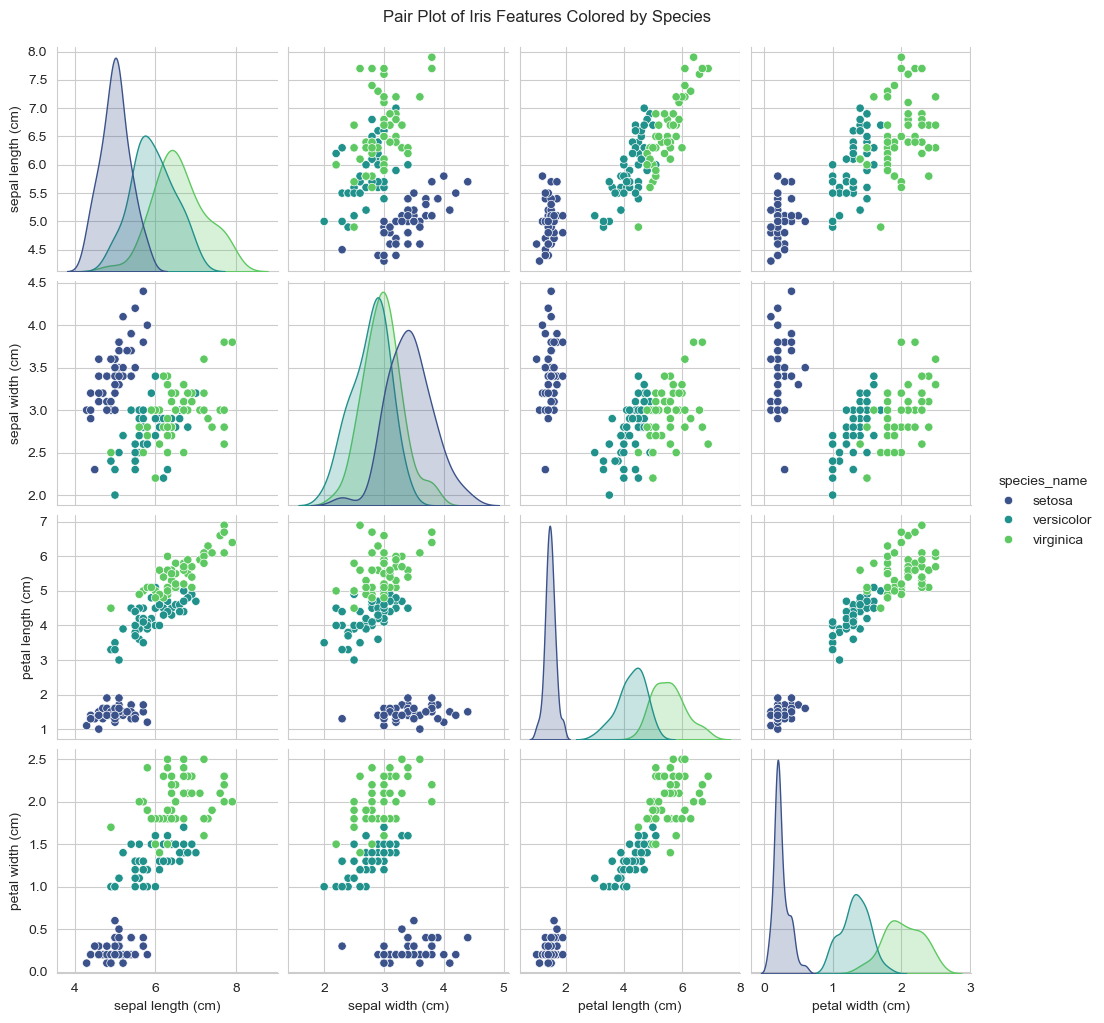

In [4]:
# Set the style for better visual appeal
sns.set_style("whitegrid")

# Create a Pair Plot for all features, colored by the 'species_name'
# This helps us visually inspect the linear separability of the classes.
sns.pairplot(df.drop('species_id', axis=1), hue='species_name', height=2.5, palette='viridis')
plt.suptitle("Pair Plot of Iris Features Colored by Species", y=1.02)
plt.show()

## Data Splitting (Training and Testing Sets)

In [5]:
# Import the necessary function from scikit-learn
from sklearn.model_selection import train_test_split

# X contains the features (sepal/petal measurements)
# y contains the target labels (species IDs 0, 1, 2)

# Split the data into 4 variables: X_train, X_test, y_train, y_test
# test_size=0.2 means 20% of the total 150 samples (i.e., 30 samples) will be in the test set.
# random_state=42 is used for reproducibility; it ensures we get the same split every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data Splitting Complete.")
print(f"Number of samples in the Training set (X_train): {len(X_train)}") 
print(f"Number of samples in the Testing set (X_test): {len(X_test)}")

 Data Splitting Complete.
Number of samples in the Training set (X_train): 120
Number of samples in the Testing set (X_test): 30


## Model Training (K-Nearest Neighbors - $K=5$)

In [6]:
# Import the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
# We set n_neighbors (K) to 5 for this initial run.
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data (X_train and y_train)
# The 'fit' method teaches the model the relationships between the features and the targets.
knn_model.fit(X_train, y_train)

print("\n KNN Model successfully trained with K=5 on the training data.")


 KNN Model successfully trained with K=5 on the training data.


## Model Prediction and Evaluation

In [7]:
# Import necessary metrics for evaluation
from sklearn.metrics import classification_report, accuracy_score

# 1. Make Predictions
# Use the trained model to predict the species for the test features (X_test)
y_pred = knn_model.predict(X_test)

# 2. Calculate Accuracy
# Compare the predicted labels (y_pred) with the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy*100:.2f}%")

# 3. Generate Classification Report
# This provides detailed metrics (Precision, Recall, F1-Score) for each species class.
# We use iris.target_names to map the IDs (0, 1, 2) back to names (setosa, versicolor, virginica).
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Model Accuracy on Test Set: 100.00%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
### it looks like overfitting we need to check

In [ ]:
#Hyperparameter Tuning (K Optimization)

In [9]:
# Initialize a list to store the error rate for each K value
error_rate = []

# Loop from K=1 to K=25 (or any reasonable range)
for i in range(1, 26):
    # Instantiate the KNN model with the current K value (i)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    pred_i = knn.predict(X_test)
    
    # Calculate the error rate (1 - Accuracy) and append it to the list
    error_rate.append(np.mean(pred_i != y_test))

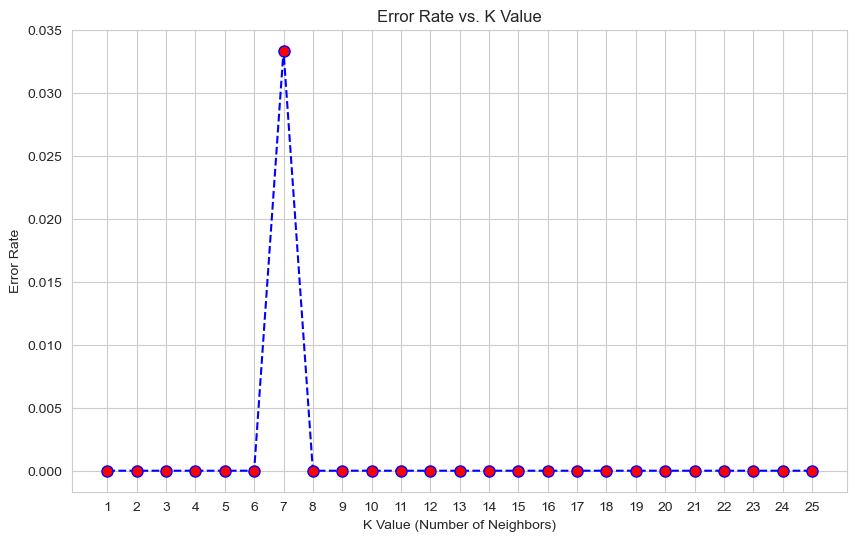

In [10]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(range(1, 26))
plt.grid(True)
plt.show()

In [11]:
# Find the K value that corresponds to the minimum error rate
best_k = error_rate.index(min(error_rate)) + 1 # +1 because list index starts at 0

print(f"\nMinimum Error Rate is {min(error_rate):.4f} at K = {best_k}")


Minimum Error Rate is 0.0000 at K = 1


In [12]:
# Train the final model using the optimal K value
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)

# Final Evaluation
final_pred = final_knn_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

print(f"\nFinal Model Accuracy (Optimal K={best_k}): {final_accuracy*100:.2f}%")
print("\n--- Final Classification Report ---")
print(classification_report(y_test, final_pred, target_names=iris.target_names))


Final Model Accuracy (Optimal K=1): 100.00%

--- Final Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

